### Barbara Karakyriakou
### MCB112
### homework 12:
#### the adventure of the 2001 dimensions

#### 1. reproduce Watsons's K-means result
Modify the K-means clustering procedure you wrote for Wiggins' data so that it works in 2001 dimensions, not just 2. Run a reasonable number of iterations (20-100, or even better, test for convergence), starting from several different initializations; report the lowest total distance (best clustering) you find for K=8. It should be close to what Watson found using k = 8 clusters: 4159.9 (sum of the squared distance = 87161.9). Note that he was using the "fixed" K-means method from part 3 of hw06, with his data represented as log counts.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA

In [2]:
df = pd.read_table('w12-data.tbl', delim_whitespace = True)
df.head()

,arugula,blueberry,cabbage,chickpea,clementine,cranberry,honeydew,mulberry,mustard,onion,...,H2BFS,PDXK,C21orf33,PFKL,KRTAP10-8,SLC19A1,SLC19A1.1,AC136352.2,AC136352.2.1,AL592183.1
0,206,219,532,261,293,253,892,214,142,167,...,43,94,528,149,703,792,170,195,999,505
1,412,476,478,485,226,374,1315,765,135,269,...,108,126,815,173,1382,1141,188,221,480,413
2,206,621,895,267,607,133,1435,302,137,515,...,103,170,432,277,653,926,219,534,1115,470
3,95,565,1039,418,181,187,381,765,95,333,...,72,110,615,418,1017,456,184,234,2286,315
4,244,531,505,547,537,393,909,452,298,481,...,128,76,694,402,1257,288,363,141,1682,424


In [3]:
# my kmean algorithm modified for high dimension data
# returns the centroids, data labels, and distances

def kmeans(X, k):
    # initialize centroids 
    C = np.random.choice(X.shape[0], size=k)
    centroids = X[C, :]
    # create a =n array to store the labels
    labels = np.zeros(X.shape[0])
    
    while True:
        # calculate the euclidean distances of each point to the centroid
        for i in range(X.shape[0]):
            euc_dist = np.sqrt(((centroids - X[i,:])**2).sum(axis=1))
            # assign labels based on the closest centroid
            labels[i] = np.argmin(euc_dist)
            
        # make a copy of the centroids to compare them with the new ones
        old_centroids = np.copy(centroids)
        # find new centroids from means of all points
        for j in range(k):
            clusters = np.where(labels==j)[0]
            if clusters.size != 0:
                centroids[j,:] = X[clusters, :].mean(axis=0)
            else: 
                # in case a cluster is empty
                centroids[j,:] = X[np.random.choice(X.shape[0],size=1), :] 
            
        # check for convergence 
        if np.all(old_centroids == centroids):
            break
        
    # calculate total distance 
    distance = 0
    for j in range(k):
        clusters = np.where(labels==j)[0]
        # find the distance of each point from each centroid
        cluster_dist = np.sqrt(((X[clusters,:] - centroids[j,:])**2).sum(axis=1))
        distance += cluster_dist.sum()
        
    return centroids, labels, distance
    
    

In [4]:
# loop to run the K-means algorithm several times
f_distances = [] # store the final total distances
centroids_lst = [] # store the centroids (means)
labels_lst = [] # store the labels (cell types)
for i in range(0, 100): # run the algorith 100 times
    centroids, labels, distance = kmeans(np.log(df.values), 8)
    centroids_lst.append(centroids)
    labels_lst.append(labels)
    f_distances.append(round(distance, 2))
print (f_distances)
best_fdist = min(f_distances), f_distances.index(min(f_distances)) 
best_fdist

[4176.97, 4183.68, 4197.83, 4177.14, 4185.57, 4176.14, 4190.8, 4183.07, 4191.09, 4181.91, 4181.94, 4216.01, 4185.02, 4197.38, 4187.69, 4174.62, 4185.14, 4187.9, 4185.91, 4194.07, 4197.43, 4185.83, 4185.31, 4193.21, 4187.77, 4175.46, 4193.97, 4185.83, 4198.08, 4191.96, 4183.09, 4184.79, 4195.82, 4186.83, 4182.58, 4180.35, 4181.87, 4186.17, 4186.95, 4195.6, 4186.8, 4184.26, 4189.02, 4182.53, 4185.0, 4183.91, 4181.84, 4195.85, 4189.19, 4181.63, 4190.35, 4191.84, 4181.14, 4193.08, 4196.54, 4185.63, 4180.85, 4191.04, 4199.01, 4187.1, 4184.54, 4184.04, 4185.44, 4173.64, 4178.68, 4183.41, 4177.43, 4192.91, 4169.55, 4188.07, 4176.94, 4190.52, 4180.03, 4193.3, 4186.86, 4187.92, 4185.67, 4206.07, 4166.2, 4183.9, 4172.26, 4187.77, 4186.86, 4178.76, 4193.92, 4173.29, 4184.39, 4182.79, 4188.57, 4182.34, 4191.61, 4173.55, 4186.33, 4179.29, 4188.02, 4186.79, 4206.23, 4183.65, 4182.2, 4187.51]


(4166.2, 78)

#### I can ran the loop few times to get a value close to 4159.9. I can also loop with a condition, as below, until I get this value. However, I did get a value very close to 4159.9, so I am going to stick to that.

In [5]:
# this will ran my kmeans algorithm enough times to return a value =<4159.9

while True:
    centroids, labels, distance = kmeans(np.log(df.values), 8)
    if distance <= 4159.90:
        break
print(distance)

4154.847704261236


#### I will use the values that I returned originally when I run my kmeans algorithm.

In [6]:
# centroids associated with then lowest total distance
centroids = centroids_lst[best_fdist[1]]
centroids

array([[5.3810583 , 6.01088467, 6.23848059, ..., 5.0100034 , 6.8766893 ,
        6.41528837],
       [5.15231613, 5.93490934, 6.18731213, ..., 5.07876352, 6.81481427,
        6.29021572],
       [5.3962252 , 6.00573324, 6.27512429, ..., 5.09281654, 6.60748622,
        6.50097084],
       ...,
       [5.10943347, 5.99053468, 6.1230306 , ..., 5.04564462, 6.72061849,
        6.40219068],
       [5.22984679, 6.05673962, 6.2549636 , ..., 5.09431254, 6.63937691,
        6.18497997],
       [5.433722  , 6.62273632, 6.02344759, ..., 5.48893773, 7.231287  ,
        7.05617528]])

In [7]:
# labels associated with then lowest total distance
labels = labels_lst[best_fdist[1]]
labels

array([5., 5., 3., 6., 1., 3., 5., 0., 1., 5., 0., 5., 4., 1., 1., 2., 6.,
       1., 5., 5., 6., 1., 1., 6., 2., 1., 1., 0., 1., 3., 5., 0., 5., 0.,
       1., 0., 2., 1., 5., 1., 2., 5., 0., 5., 5., 1., 0., 0., 0., 2., 6.,
       3., 0., 3., 1., 3., 1., 6., 0., 1., 5., 5., 2., 1., 2., 6., 0., 5.,
       5., 6., 1., 1., 0., 1., 3., 0., 0., 3., 5., 5., 3., 5., 5., 1., 1.,
       5., 5., 5., 0., 6., 0., 1., 5., 5., 1., 5., 1., 5., 5., 0., 3., 5.,
       1., 5., 1., 2., 6., 5., 0., 3., 5., 0., 5., 6., 0., 5., 0., 0., 1.,
       6., 0., 2., 5., 5., 0., 3., 6., 0., 5., 2., 5., 6., 5., 7., 0., 5.,
       5., 0., 6., 0., 5., 6., 0., 5., 0., 0., 5., 3., 0., 0., 6., 3., 5.,
       1., 0., 3., 1., 1., 5., 1., 6., 2., 5., 5., 5., 5., 0., 6., 3., 0.,
       5., 0., 2., 0., 5., 1., 1., 1., 5., 1., 2., 6., 3., 6., 0., 0., 3.,
       6., 5., 1., 5., 0., 5., 0., 1., 2., 5., 5., 5., 1.])

#### I am counting the cluster lengths in an attempt to reproduce the white lines that Watson added on his heatmap.

In [8]:
cluster_counts = Counter(labels)
cluster_counts

Counter({5.0: 60, 3.0: 18, 6.0: 22, 1.0: 40, 0.0: 44, 4.0: 1, 2.0: 14, 7.0: 1})

In [9]:
lines = [cluster_counts[0]+cluster_counts[1]+cluster_counts[2]+cluster_counts[3]
         +cluster_counts[4]+cluster_counts[5]+cluster_counts[6]
         ,cluster_counts[0]+cluster_counts[1]+cluster_counts[2]
         +cluster_counts[3]+cluster_counts[4]+cluster_counts[5]
         ,cluster_counts[0]+cluster_counts[1]+cluster_counts[2]
         +cluster_counts[3]+cluster_counts[4],cluster_counts[0]
         +cluster_counts[1]+cluster_counts[2]+cluster_counts[3]
         ,cluster_counts[0]+cluster_counts[1]+cluster_counts[2]
         ,cluster_counts[0]+cluster_counts[1],cluster_counts[0]]
lines

[199, 177, 117, 116, 98, 84, 44]

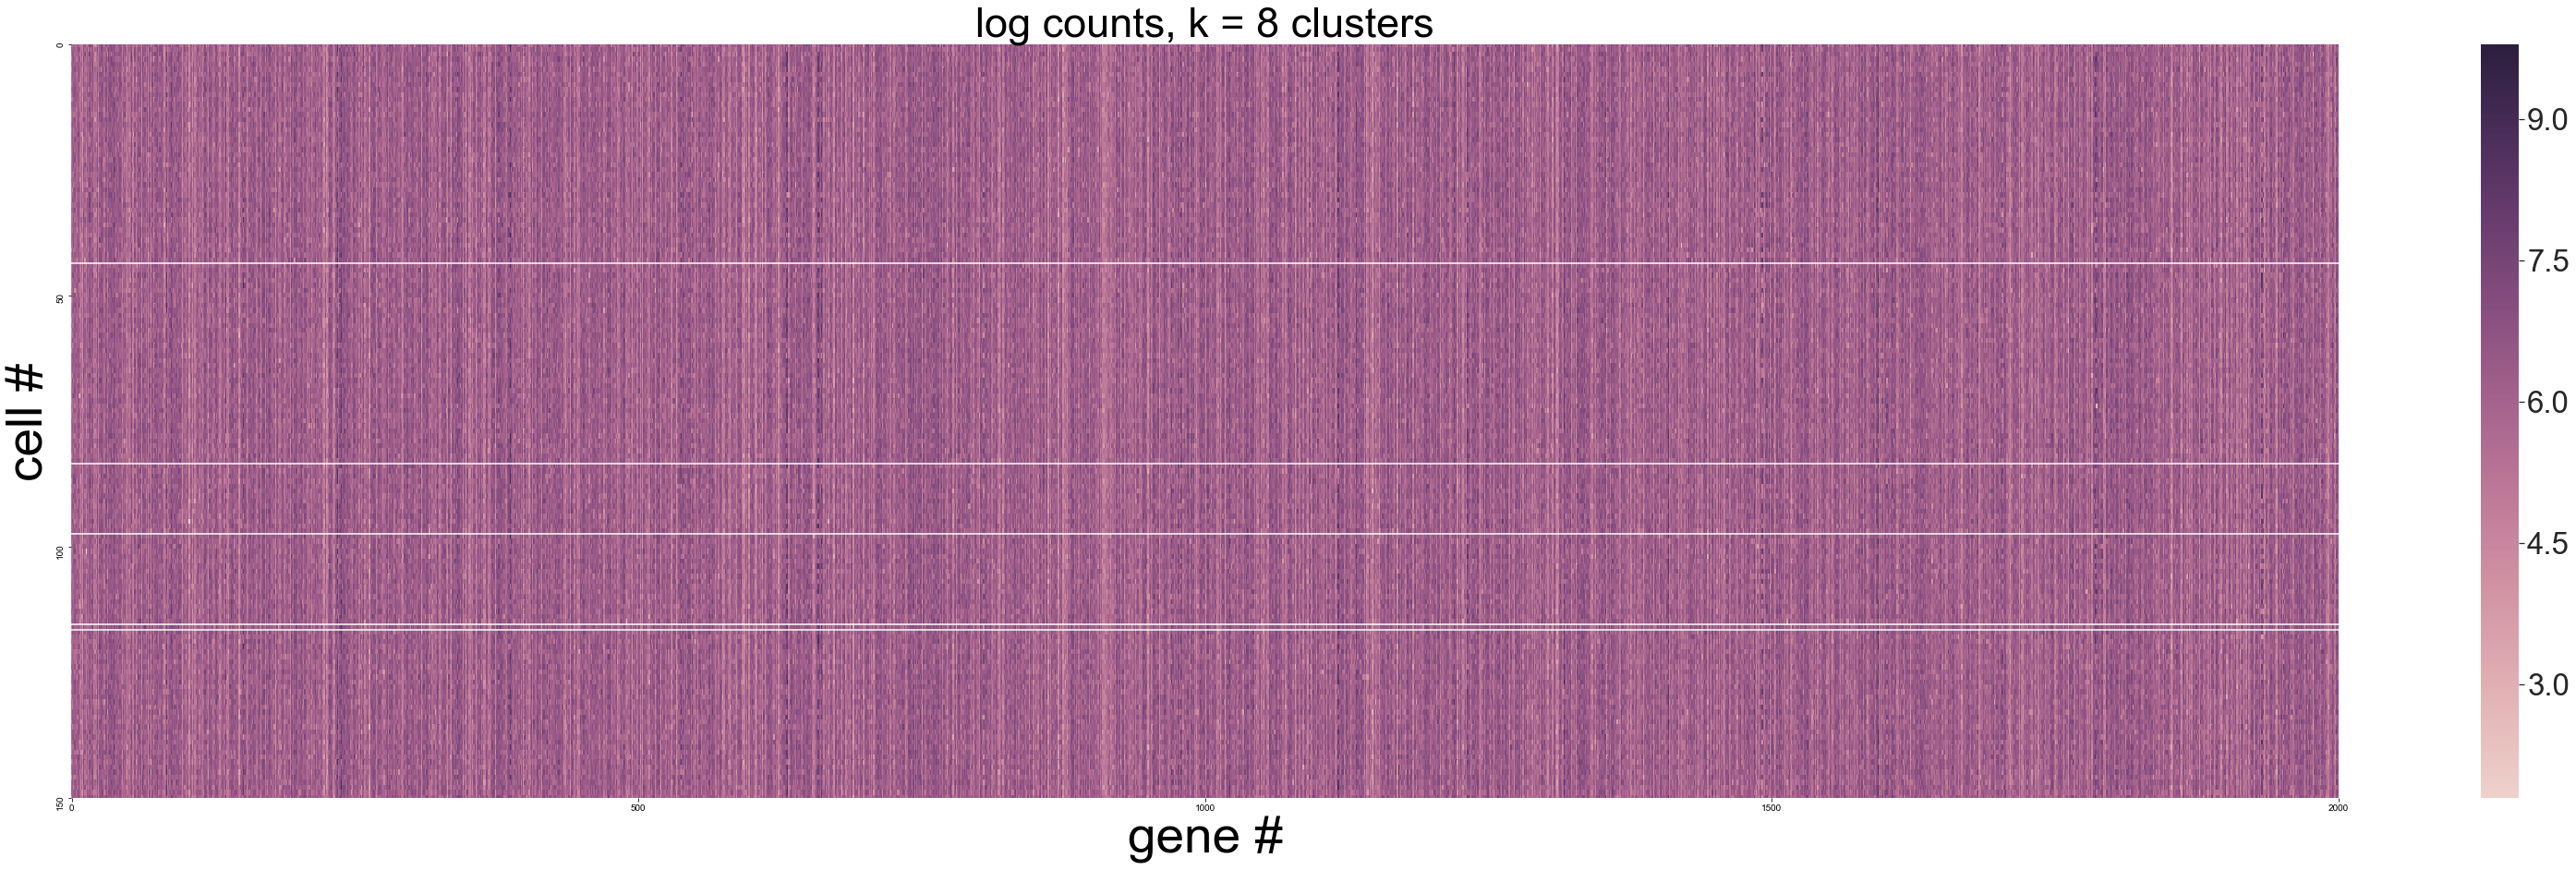

In [10]:
# returns a heatmap similar to Watson's

fig, ax = plt.subplots(figsize=(55,15))
sns.set(font_scale = 3)
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(np.log(df.values), cmap = cmap, xticklabels=500, yticklabels=50)
ax.set_title('log counts, k = 8 clusters', fontsize=45)
ax.set_xlabel('gene #', fontsize=55)
ax.set_ylabel('cell #', fontsize=55)
ax.hlines(lines, *ax.get_xlim(), colors='w')
plt.show()

#### 2. reduce the dimensionality
Write a Python function that uses singular value decomposition to find the principal components of the data set.

Plot all 200 cells in 2D expression space using their projections onto the first two principal axes.

Was Watson right to expect 8 clusters? Plot the eigenvalues for each component, and justify why you're pretty sure it would be hard to find any other clusters in the data set. The eigenvalues from a simulated negative control data set, where there were no cell types and no correlations between any of the genes, should factor into your answer.

Based on the eigenvector loadings, how many genes appear to influence cell type identity?

#### I am going to use logs instead of the original values, like I did with the kmeans. This will eliminate any skewness. (I have tested the SVD algorithm on raw data and the results were not optimal).

In [11]:
# centering the data (after taking the logs of them)
df_centered = np.log(df).apply(lambda x: x-x.mean(0))

In [12]:
df_centered.head()

,arugula,blueberry,cabbage,chickpea,clementine,cranberry,honeydew,mulberry,mustard,onion,...,H2BFS,PDXK,C21orf33,PFKL,KRTAP10-8,SLC19A1,SLC19A1.1,AC136352.2,AC136352.2.1,AL592183.1
0,0.119898,-0.621511,0.084508,-0.696855,-0.385282,-0.009428,-0.018674,-0.564282,0.155548,-0.625124,...,-0.936919,-0.376898,0.204285,-0.809872,-0.242750,0.181383,-0.339832,0.208958,0.132983,-0.132988
1,0.813045,0.154835,-0.022524,-0.077227,-0.644919,0.381438,0.369452,0.709618,0.104996,-0.148407,...,-0.015988,-0.083911,0.638376,-0.660527,0.433180,0.546482,-0.239188,0.334121,-0.599986,-0.334099
2,0.119898,0.420748,0.604689,-0.674127,0.343074,-0.652469,0.456780,-0.219831,0.119702,0.501049,...,-0.063390,0.215606,0.003614,-0.189801,-0.316530,0.337696,-0.086558,1.216354,0.242838,-0.204814
3,-0.654102,0.326243,0.753879,-0.225894,-0.866957,-0.311709,-0.869340,0.709618,-0.246402,0.065025,...,-0.421453,-0.219712,0.356811,0.221663,0.126505,-0.370686,-0.260694,0.391279,0.960787,-0.604974
4,0.289190,0.264179,0.032423,0.043073,0.220544,0.430992,0.000205,0.183425,0.896815,0.432749,...,0.153911,-0.589459,0.477660,0.182634,0.338376,-0.830218,0.418773,-0.115282,0.653967,-0.307813


In [13]:
# applying SVD to get the 3 matrices  (U,S,W^T)
USW = np.linalg.svd(df_centered, full_matrices=False)

In [14]:
U = USW[0]
S = USW[1]
WT = USW[2]
U.shape, S.shape, WT.shape

((200, 200), (200,), (200, 2001))

In [15]:
# creating dataframes to better visualize the data and make calculations as needed.
dfU = pd.DataFrame(U)
dfU.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.084732,0.065527,0.042992,-0.087552,0.111553,-0.081644,0.016373,-0.062257,0.029001,-0.110839,...,-0.097961,0.021082,-0.010456,0.003634,-0.032767,0.024826,-0.055242,0.061801,-0.039761,0.070711
1,-0.090809,0.044755,-0.015517,0.076612,-0.143901,-0.004838,0.067085,0.159236,-0.104352,0.046923,...,0.041989,0.131744,-0.028951,0.083514,0.080019,0.083668,-0.121391,-0.154888,-0.045367,0.070711
2,0.074358,0.045106,-0.059021,-0.068467,0.110402,0.027485,-0.013372,-0.026102,0.024604,-0.003662,...,0.145892,0.010081,0.057902,0.049877,-0.014490,0.094782,0.066591,-0.045508,0.014973,0.070711
3,0.030848,-0.086076,-0.046425,-0.103963,-0.031559,-0.037581,0.038794,-0.020870,0.089920,-0.104569,...,-0.034206,-0.168087,0.047429,0.061964,0.053079,0.134959,0.007518,0.010529,0.075157,0.070711
4,0.051088,-0.084324,0.011592,-0.031907,0.082845,0.021592,-0.016190,0.191837,0.070054,-0.031773,...,0.069722,-0.063009,-0.013119,0.058708,0.046957,0.027945,0.048966,0.118174,0.041540,0.070711


In [16]:
dfS = pd.DataFrame(np.diag(S))
dfS.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,64.324444,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,43.801241,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,27.73007,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.00000,27.662631,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.00000,0.000000,27.495422,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
dfS.shape

(200, 200)

In [18]:
dfWT = pd.DataFrame(WT)
dfWT.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0.008506,0.001565,0.009296,0.009455,-0.002312,0.002378,0.002346,0.007462,0.012792,0.000703,...,0.012183,0.021772,0.002330,-0.001031,0.002262,0.008376,0.007626,-0.000851,0.012620,-0.011772
1,0.021280,0.002017,-0.000178,-0.000731,0.000248,-0.003202,0.015339,0.002914,0.000348,-0.013753,...,0.016323,0.015827,0.007028,-0.010271,-0.000895,0.001146,-0.003797,-0.001268,0.002585,0.019684
2,0.028110,-0.017971,0.000168,0.011554,-0.012659,-0.037268,-0.009315,-0.001836,0.003875,0.038918,...,0.000320,-0.030504,-0.012155,-0.016055,-0.010723,-0.002685,0.003570,0.001132,0.010780,0.025078
3,0.023747,-0.039627,-0.030549,-0.016295,-0.028162,0.013904,0.008819,0.016558,0.026812,0.026261,...,-0.018747,0.040428,0.015546,-0.014345,-0.011899,0.026492,-0.020975,-0.019266,-0.009826,0.002056
4,0.034553,-0.026992,-0.029468,-0.004099,0.021763,-0.014024,0.007534,-0.004139,-0.038071,-0.031591,...,-0.043680,0.064124,0.022923,-0.055985,-0.013653,0.011907,-0.005826,0.025236,-0.002015,0.002322


In [19]:
# transpose the matrix to get the eigenvectors in columns
dfW = dfWT.T
dfW.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.008506,0.021280,0.028110,0.023747,0.034553,-0.014027,0.004483,0.033013,0.031366,-0.013479,...,-0.024968,0.015676,-0.015091,-0.002977,-0.038335,0.019998,-0.026131,-0.015039,0.021053,0.003259
1,0.001565,0.002017,-0.017971,-0.039627,-0.026992,0.019497,-0.050724,0.004224,-0.039498,0.021043,...,0.009248,0.002239,-0.009391,0.037525,-0.016078,-0.018708,-0.013294,-0.006700,0.010237,0.021314
2,0.009296,-0.000178,0.000168,-0.030549,-0.029468,-0.012097,0.035793,-0.014969,-0.007452,-0.032116,...,-0.004460,0.002985,-0.009981,0.045147,0.026057,-0.042567,0.045355,-0.003395,0.054608,-0.039498
3,0.009455,-0.000731,0.011554,-0.016295,-0.004099,-0.018493,-0.011982,0.053288,0.008981,0.041268,...,-0.005342,0.003356,0.048365,0.034409,-0.008047,-0.035075,0.005510,0.003205,-0.015059,0.009215
4,-0.002312,0.000248,-0.012659,-0.028162,0.021763,-0.013723,-0.031963,-0.020814,-0.000946,-0.002636,...,0.011873,0.007869,-0.029837,-0.012276,0.012408,-0.004747,0.019084,0.003170,0.001549,-0.005799


In [20]:
# changing the index to associate the genes
dfW = dfW.set_index(df.columns.values)
dfW.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
arugula,0.008506,0.021280,0.028110,0.023747,0.034553,-0.014027,0.004483,0.033013,0.031366,-0.013479,...,-0.024968,0.015676,-0.015091,-0.002977,-0.038335,0.019998,-0.026131,-0.015039,0.021053,0.003259
blueberry,0.001565,0.002017,-0.017971,-0.039627,-0.026992,0.019497,-0.050724,0.004224,-0.039498,0.021043,...,0.009248,0.002239,-0.009391,0.037525,-0.016078,-0.018708,-0.013294,-0.006700,0.010237,0.021314
cabbage,0.009296,-0.000178,0.000168,-0.030549,-0.029468,-0.012097,0.035793,-0.014969,-0.007452,-0.032116,...,-0.004460,0.002985,-0.009981,0.045147,0.026057,-0.042567,0.045355,-0.003395,0.054608,-0.039498
chickpea,0.009455,-0.000731,0.011554,-0.016295,-0.004099,-0.018493,-0.011982,0.053288,0.008981,0.041268,...,-0.005342,0.003356,0.048365,0.034409,-0.008047,-0.035075,0.005510,0.003205,-0.015059,0.009215
clementine,-0.002312,0.000248,-0.012659,-0.028162,0.021763,-0.013723,-0.031963,-0.020814,-0.000946,-0.002636,...,0.011873,0.007869,-0.029837,-0.012276,0.012408,-0.004747,0.019084,0.003170,0.001549,-0.005799


In [21]:
dfW.shape

(2001, 200)

#### Checking that we are on the right track: compare the Sigma value (diagonal) of the covariance matrix with the Lambda value from SVD (S matrix).

In [22]:
# eigenvaues of the covariance matrix (Sigma diagonal)
Sigma  = np.cov(np.log(df), rowvar=False)
sum(np.diag(Sigma))

478.8587872649531

In [23]:
# eigenvalues by SVD
Lambda =(np.diag(dfS))**2/199
print(Lambda.sum())

478.8587872649538


#### We are on the right track. We can also double check by performing on the centered data scikit's PCA method.

In [24]:
pca = PCA(n_components=2)
project = pca.fit_transform(np.log(df))
print(pca.singular_values_)

[64.32444427 43.80121721]


In [25]:
dfS.iloc[0,0], dfS.iloc[1,1]

(64.32444427488706, 43.80124076954413)

In [26]:
print(pca.components_[:, :5])

[[-0.0085062  -0.00156476 -0.00929555 -0.0094545   0.0023123 ]
 [ 0.02127912  0.00199869 -0.00018635 -0.00066061  0.00022099]]


In [27]:
dfW.iloc[:,:2].head(5)

,0,1
arugula,0.008506,0.021280
blueberry,0.001565,0.002017
cabbage,0.009296,-0.000178
chickpea,0.009455,-0.000731
clementine,-0.002312,0.000248


#### It looks like we are on the right track. The only difference is that PCA reversed the signs on the first component.

#### Now we need to create a matrix with the PC scores or the principal componets for each data observation along one principal axis. We will project the centered data onto the eigen vectors from our W matrix. We will do that for the first two eigenvectors with the largest eigenvalues.

In [28]:
# projecting the data to the first two eigenvectors
components = df_centered @ dfW
components.head()
df_project = components.iloc[:,:2].rename(columns ={0:'PC1', 1:'PC2'})
df_project.head()

,PC1,PC2
0,-5.450321,2.870177
1,-5.841239,1.960328
2,4.783064,1.975678
3,1.984253,-3.770222
4,3.286187,-3.693508


In [29]:
# checking again to ensure that we are on the right track
print(pca.fit_transform(np.log(df))[:5])

[[ 5.45031946  2.86999834]
 [ 5.84124623  1.95949736]
 [-4.783065    1.97595455]
 [-1.98424828 -3.77007148]
 [-3.28618718 -3.69198614]]


#### Now we can visualize the data (200 cells) in a 2D plot.

Text(0, 0.5, 'PC2')

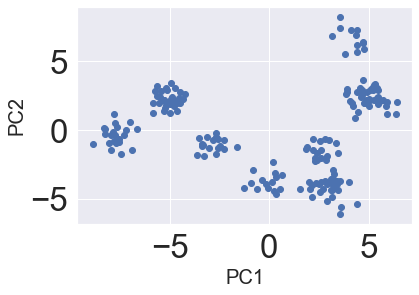

In [30]:
plt.scatter(df_project.iloc[:,0], df_project.iloc[:,1])
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)

#### Watson was right, we can identify 8 clusters. We are pretty sure that there are no more than 8 clusters, because the first two eigenvalues are the most significant and the first two PCs account for almost all the variability of the data. This is obvious when we plot the eigenvalues against the components, and also when we divide each eigenvalue by the sum of the total eigenvalues. As we know, the proportion of variance captured by a component is its eigenvalue divided by the total sum of the eigenvalues.

In [31]:
# printing the first 6, the 100th, and the last of the eigenvalues divided by the sum.
print((Lambda[0]/Lambda.sum()))
print((Lambda[1]/Lambda.sum()))
print((Lambda[2]/Lambda.sum()))
print((Lambda[3]/Lambda.sum()))
print((Lambda[4]/Lambda.sum()))
print((Lambda[5]/Lambda.sum()))
print((Lambda[6]/Lambda.sum()))
print((Lambda[100]/Lambda.sum()))
print((Lambda[199]/Lambda.sum()))

0.043420172848212896
0.020133175921970597
0.008069402577195958
0.0080302013205254
0.007933416306023325
0.007818573131208404
0.007805923523417463
0.004609778644656274
2.6576948511112526e-29


#### We can see that the first two values are significantly higher, and from the 3rd and beyond they decline.<br>We can also compare the eigenvalues with the eigenvalues from the negative control data set in which there is no correlations between the genes.

In [32]:
neg_ctrl = pd.read_table('w12-eigen.tbl', header=None, 
                         delim_whitespace = True, index_col=0).astype(float)
neg_ctrl.values

array([[3.859],
       [3.77 ],
       [3.722],
       [3.7  ],
       [3.669],
       [3.647],
       [3.632],
       [3.59 ],
       [3.549],
       [3.525],
       [3.508],
       [3.477],
       [3.468],
       [3.44 ],
       [3.416],
       [3.386],
       [3.38 ],
       [3.361],
       [3.345],
       [3.318],
       [3.299],
       [3.282],
       [3.26 ],
       [3.253],
       [3.219],
       [3.198],
       [3.176],
       [3.16 ],
       [3.153],
       [3.132],
       [3.119],
       [3.069],
       [3.056],
       [3.046],
       [3.035],
       [3.031],
       [3.011],
       [2.998],
       [2.971],
       [2.954],
       [2.929],
       [2.903],
       [2.9  ],
       [2.889],
       [2.877],
       [2.859],
       [2.853],
       [2.83 ],
       [2.808],
       [2.799],
       [2.786],
       [2.776],
       [2.759],
       [2.75 ],
       [2.735],
       [2.719],
       [2.701],
       [2.687],
       [2.668],
       [2.656],
       [2.652],
       [2.626],
       [

In [33]:
Lambda

array([2.07921313e+01, 9.64094821e+00, 3.86410433e+00, 3.84533247e+00,
       3.79898611e+00, 3.74399245e+00, 3.73793507e+00, 3.67840714e+00,
       3.65507948e+00, 3.62615007e+00, 3.56105493e+00, 3.55005467e+00,
       3.51243065e+00, 3.49979411e+00, 3.47746041e+00, 3.45595655e+00,
       3.43780432e+00, 3.42869299e+00, 3.39368792e+00, 3.37109850e+00,
       3.35972559e+00, 3.34121915e+00, 3.31753501e+00, 3.28384644e+00,
       3.24024827e+00, 3.23241478e+00, 3.21432946e+00, 3.19648125e+00,
       3.19275497e+00, 3.15405628e+00, 3.14491258e+00, 3.12991594e+00,
       3.11935637e+00, 3.08615599e+00, 3.08023278e+00, 3.07358291e+00,
       3.05573570e+00, 3.03853923e+00, 3.01770921e+00, 3.00403149e+00,
       2.98173236e+00, 2.95110240e+00, 2.93815153e+00, 2.92606118e+00,
       2.91179372e+00, 2.90132970e+00, 2.88457252e+00, 2.86795500e+00,
       2.85906721e+00, 2.83816392e+00, 2.82342430e+00, 2.81762133e+00,
       2.80571787e+00, 2.78040708e+00, 2.77019198e+00, 2.75854353e+00,
      

#### By comparing the two sets of eigenvalues we can see also that our first two Lambda values are high and the rest are matching the values of the negative control, therefore they do not account for any data variability. <br>When we plot the eigenvalues against the components, we also make the same conclusion.

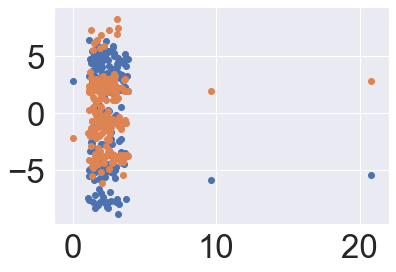

In [34]:
plt.scatter(Lambda, df_project.iloc[:,0])
plt.scatter(Lambda, df_project.iloc[:,1])

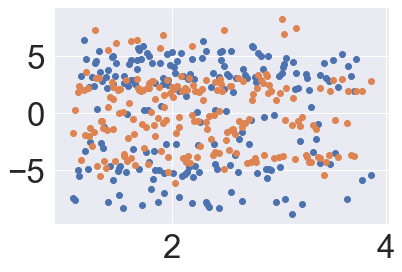

In [35]:
# plotting the negative control
plt.scatter(neg_ctrl, df_project.iloc[:199,0])
plt.scatter(neg_ctrl, df_project.iloc[:199,1])

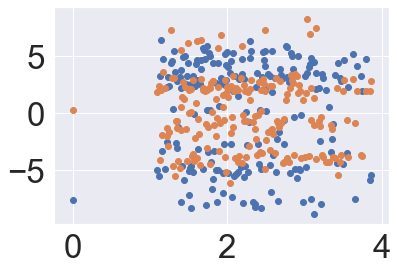

In [36]:
# plotting the Lambda without the first two eigenvalues
plt.scatter(Lambda[2:], df_project.iloc[:198,0])
plt.scatter(Lambda[2:], df_project.iloc[:198,1])

#### Now we want to see how many genes influence cell identity. We can plot the eigenvector loadings and take a look to see how many project away from the origin, because as we know variables that aren't contributing much variance along a principal axis will fall near the origin.

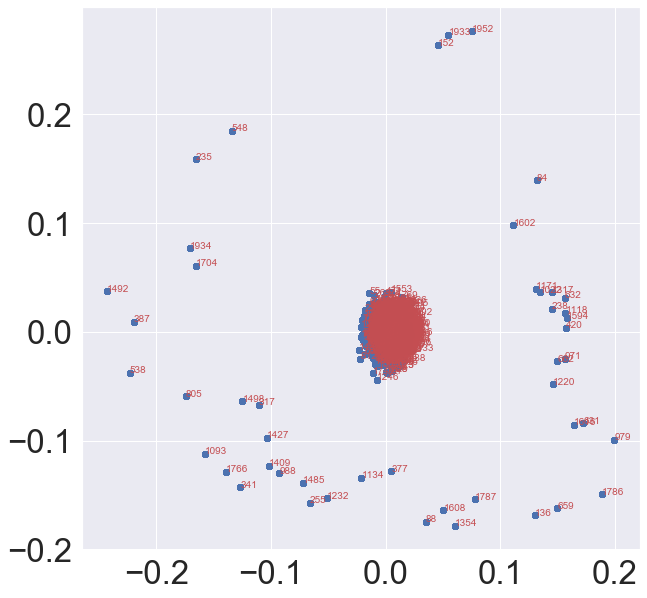

In [37]:
fig = plt.figure(figsize=(10,10))

for i in range(2001):
    x = dfW.iloc[:,0]
    y = dfW.iloc[:,1]
    plt.plot(x, y, 'bo')
    plt.text(x[i], y[i], i, fontsize=10, color='r')
    
plt.show()

#### We can identify 47 genes that are away from the PC origin and therefore influence mostly cell identity. We can also identify the same number of genes in the biplot below (plot with PC scores (dots) and variable loadings (arrows).

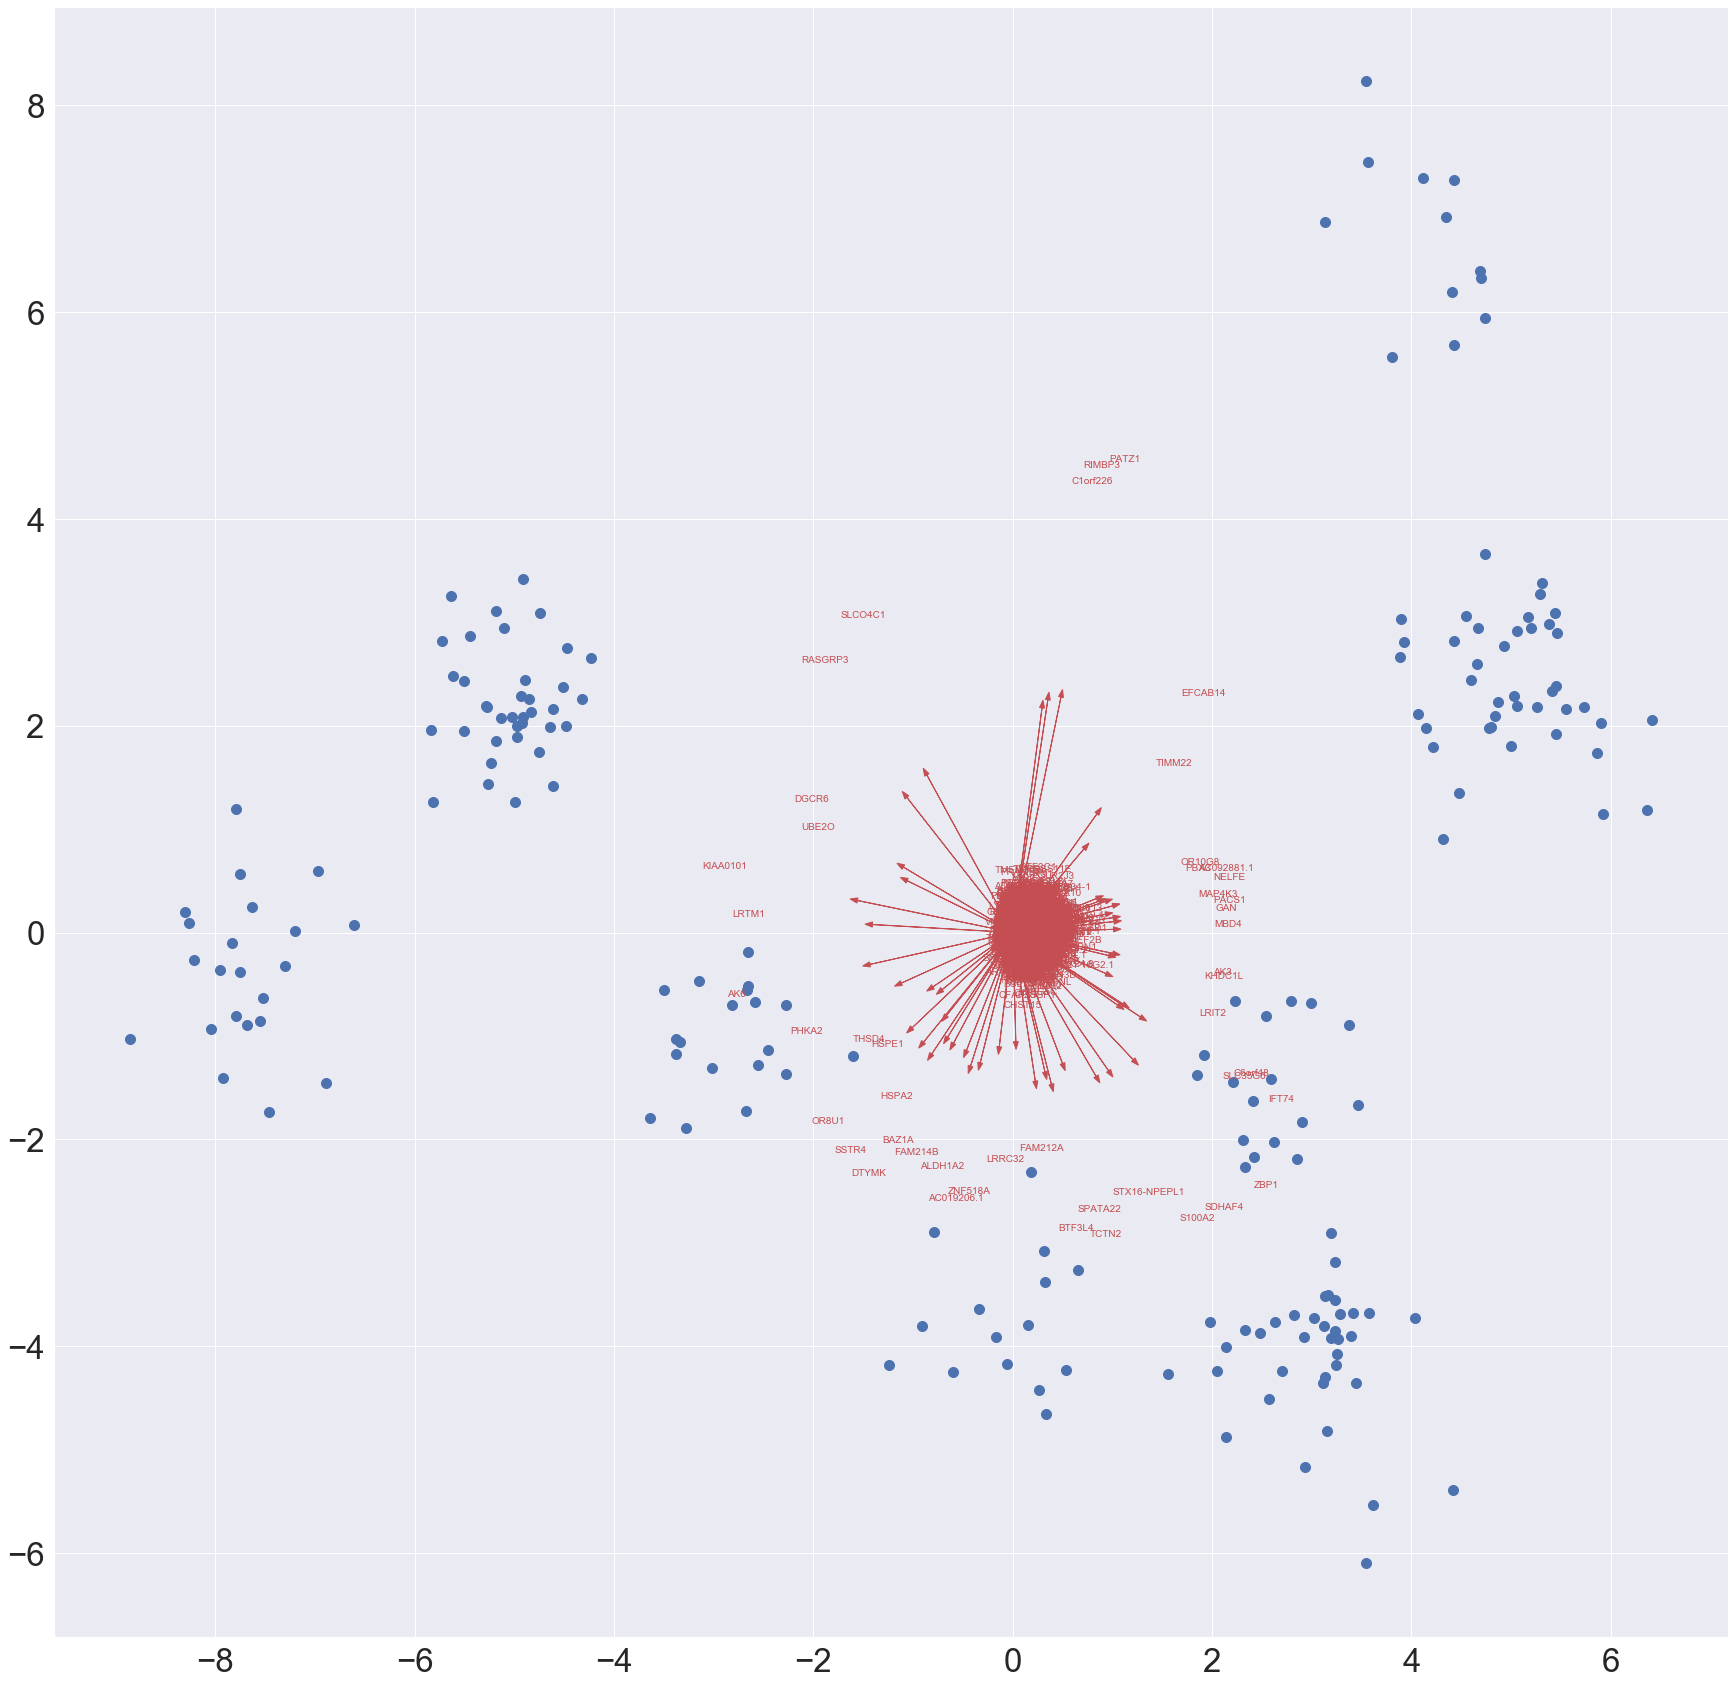

In [38]:
# visualize projections (PC scores) and vector loadings.
fig = plt.figure(figsize=(30,30))

for i in range(len(dfW.iloc[:,0])): # iterate over the length of a vector
    # plot vectors  loadings as arrows
    plt.arrow(0, 0, dfW.iloc[:,0][i]*max(df_project.iloc[:,0]), 
              dfW.iloc[:,1][i]*max(df_project.iloc[:,1]),color='r', head_width=0.05)
    # plot gene names as vector loading labels
    plt.text(dfW.iloc[:,0][i]*max(df_project.iloc[:,0])*2,
             dfW.iloc[:,1][i]*max(df_project.iloc[:,1])*2,
             list(df.columns.values)[i], color='r', fontsize = 10)

for i in range(len(df_project.iloc[:,0])): # iterate over the length of a PC
    # plot the PCs as dots
    plt.plot(df_project.iloc[:,0][i], df_project.iloc[:,1][i], 'bo', markersize=10)


plt.show()

#### Same as before, we count 47 genes (arrows) in the biplot that fall away from the PC origin. If we dig a little further, it appears that these genes are the ones with the higher standard deviation.

#### I am going to select few genes from the biplot, just to see their std range.

In [39]:
df['ZBP1'].std(), df['S100A2'].std(), df['SPATA22'].std(), df['C1orf226'].std() 

(1438.0569476985677,
 1175.6025579981779,
 495.65774776005753,
 1194.3148787160835)

In [40]:
# checking the std range of all genes
df.std().max(), df.std().min()

(3763.5570350074095, 39.624993064691935)

#### I am going to use 'SPATA22' as a threshold and I will find the genes with a standard deviation equal or higher.

In [41]:
impt_genes = pd.DataFrame(df.std())
impt_genes  = impt_genes.loc[impt_genes.iloc[:,0]>=495]
len(impt_genes), impt_genes.index.values, impt_genes.max(), impt_genes.min()

(47, array(['EFCAB14', 'BTF3L4', 'S100A2', 'C1orf226', 'RASGRP3', 'MAP4K3',
        'HSPE1', 'DTYMK', 'FAM212A', 'LRTM1', 'MBD4', 'AK6', 'SLCO4C1',
        'DCTN4', 'C6orf48', 'NELFE', 'SDHAF4', 'KHDC1L', 'SEMA3E', 'PHKA2',
        'AK3', 'IFT74', 'FAM214B', 'PBX3', 'OR8U1', 'PACS1', 'LRRC32',
        'OR10G8', 'LRIT2', 'ZNF518A', 'AC092881.1', 'TCTN2', 'BAZ1A',
        'HSPA2', 'ALDH1A2', 'KIAA0101', 'THSD4', 'GAN', 'SPATA22',
        'SLC35G6', 'UBE2O', 'SSTR4', 'ZBP1', 'STX16-NPEPL1', 'RIMBP3',
        'DGCR6', 'PATZ1'], dtype=object), 0    3763.557035
 dtype: float64, 0    495.657748
 dtype: float64)

#### It turns out that there are 47 genes within the range of 495-3763, and they are the ones with the largest std values from the whole data set of genes. By looking at their names, they appear to be the same ones that were projecting away from the PC origin at the biplot.

#### 3. check the K
Plot the data in 2D principal component space, and color each point according to the cluster identities from part 1. You should find the K-means is really missing the mark.

Offer an explanation of what might be going wrong, and find a way to cluster so that each cell appears properly assigned in PC space.

Text(0, 0.5, 'PC2')

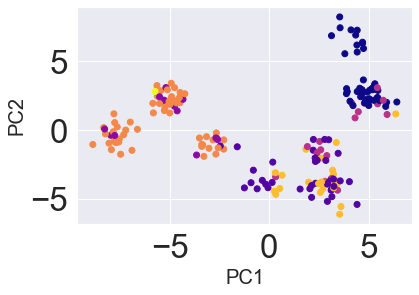

In [42]:
# plotting PC1 against PC2 and label the clusters using the kmeans label from part1.
plt.scatter(df_project.iloc[:,0], df_project.iloc[:,1], c=labels, cmap='plasma')
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)

#### The kmeans labels do not correctly match the clusters. This is most likely because of the data noise. As we figured by applying SVD on the data, there are only two principal components and the rest of the data is mostly noise.<br>In order for kmeans to identify the correct clusters, we can apply it on the de-noised data (after we applied SVD).<br>I will run my kmeans algorith in the transormed data, and utilize the new labels to color the points.

In [43]:
# loop to run the K-means algorithm several times
f_distances = [] # store the final total distances
centroids_lst = [] # store the centroids (means)
labels_lst = [] # store the labels (cell types)
for i in range(0, 100): # run the algorith 100 times
    centroids, labels, distance = kmeans(df_project.values, 8)
    centroids_lst.append(centroids)
    labels_lst.append(labels)
    f_distances.append(round(distance, 2))
print (f_distances)
best_fdist = min(f_distances), f_distances.index(min(f_distances)) 
best_fdist

[196.79, 217.93, 205.49, 209.11, 184.63, 212.9, 170.37, 174.31, 250.74, 205.92, 184.63, 267.76, 174.18, 215.98, 186.17, 200.93, 207.16, 170.41, 142.43, 217.43, 200.05, 171.84, 171.78, 184.42, 241.63, 205.92, 186.45, 208.66, 205.2, 185.51, 245.6, 205.2, 235.24, 239.26, 170.52, 142.43, 168.54, 142.43, 142.43, 167.74, 184.39, 205.92, 205.52, 213.23, 207.16, 172.77, 246.07, 200.4, 168.85, 197.09, 142.43, 231.35, 196.52, 244.87, 207.97, 234.59, 170.87, 142.43, 173.76, 142.43, 217.79, 142.43, 184.39, 205.89, 184.63, 216.2, 185.62, 142.43, 187.02, 235.98, 174.43, 205.49, 217.84, 184.63, 186.45, 142.43, 205.89, 142.43, 236.01, 208.04, 196.14, 184.3, 184.42, 247.4, 173.88, 184.42, 142.43, 142.43, 235.24, 235.01, 142.43, 207.16, 142.43, 170.93, 204.23, 169.17, 169.17, 171.3, 173.81, 171.03]


(142.43, 18)

In [44]:
new_labels = labels_lst[best_fdist[1]]
new_labels

array([1., 1., 7., 2., 2., 7., 4., 7., 2., 5., 7., 1., 2., 2., 2., 1., 2.,
       3., 5., 5., 3., 2., 2., 2., 4., 5., 6., 0., 2., 7., 4., 7., 4., 0.,
       2., 0., 1., 2., 4., 3., 1., 1., 7., 1., 1., 3., 7., 7., 7., 1., 2.,
       2., 7., 7., 3., 5., 2., 6., 7., 5., 4., 5., 1., 2., 5., 6., 7., 4.,
       1., 2., 6., 3., 0., 2., 7., 7., 7., 2., 4., 1., 3., 1., 5., 2., 6.,
       4., 4., 4., 7., 7., 7., 3., 1., 5., 3., 1., 6., 1., 4., 0., 2., 1.,
       2., 1., 2., 1., 2., 1., 7., 6., 4., 7., 5., 2., 7., 1., 7., 7., 2.,
       2., 7., 5., 1., 4., 0., 6., 3., 0., 1., 4., 1., 6., 5., 1., 7., 4.,
       1., 7., 3., 7., 5., 3., 7., 4., 7., 7., 1., 7., 7., 0., 2., 6., 5.,
       2., 0., 7., 6., 3., 1., 2., 2., 4., 1., 1., 4., 1., 0., 2., 6., 7.,
       1., 7., 1., 0., 4., 6., 2., 3., 5., 6., 5., 2., 7., 3., 7., 0., 6.,
       2., 5., 6., 1., 7., 5., 7., 2., 1., 1., 4., 4., 6.])

Text(0, 0.5, 'PC2')

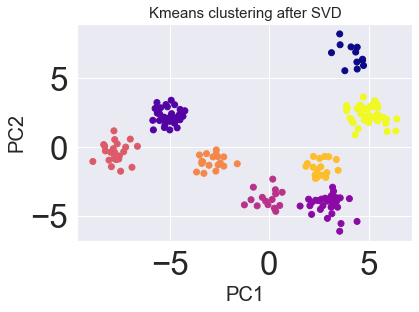

In [45]:
plt.scatter(df_project.iloc[:,0], df_project.iloc[:,1], c=new_labels, cmap='plasma')
plt.title('Kmeans clustering after SVD', fontsize=15)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)

#### Now the kmeans algorithm works. It labels each cell properly according to its cluster.

#### 4. reconstruct the expression patterns
Reconstruct the original data set using only the projected data and eigenvectors for the first 2 principal components. Visualize the data using a heat map. Do the clusters now look more obvious? Why or why not?

In [47]:
# reconstruct data by the projected data and the eigenvectors for the first 2 PC
# we can also multiply U*S for the first two components instead of the projected data
# e.g. np.dot(U[:,:2]*S[:2], dfWT.iloc[:2,:].values)+data_means.values
df_recon =pd.DataFrame(data =np.dot(df_project, dfWT.iloc[:2,:].values),
                        columns = df.columns.values )
df_recon.shape

(200, 2001)

In [48]:
# sorted by the new labels that fit best
df_recon.values[np.argsort(new_labels)]

array([[ 0.1668018 ,  0.01940582,  0.04302714, ..., -0.01156785,
         0.07521246,  0.06115065],
       [ 0.19022807,  0.0211485 ,  0.03693546, ..., -0.0127466 ,
         0.07076539,  0.09518254],
       [ 0.2054521 ,  0.02216112,  0.03149623, ..., -0.01345823,
         0.06604413,  0.12040299],
       ...,
       [ 0.08310178,  0.0115182 ,  0.04428055, ..., -0.00660259,
         0.06572901, -0.01743371],
       [ 0.10931655,  0.01444355,  0.04950557, ..., -0.00836412,
         0.07564803, -0.00460006],
       [ 0.09714747,  0.01333895,  0.05020852, ..., -0.00766136,
         0.07491336, -0.01711723]])

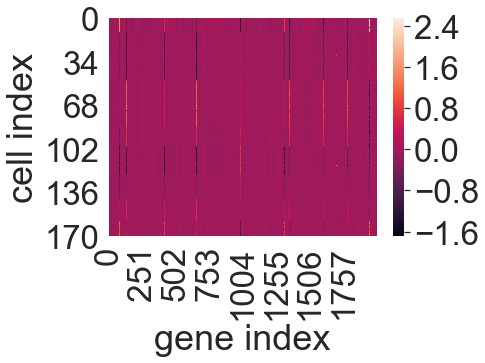

In [59]:
# plotting the reconstructed and sorted by kmeans data in a heatmap
sns.heatmap(df_recon.values[np.argsort(new_labels)])
plt.xlabel('gene index')
plt.ylabel('cell index')
plt.show()

#### We can see some vertical lines that indicate variability, but we cannot clearly identify any clusters. This is probably because we plotted all genes. We may want to select genes that are most important, this is to say genes that contribute the most to cell identities. Previously we identified 47 such genes.<br>I am goint to filter the reconstucted data by selecting genes with larger standard deviations.

In [50]:
# checking std range in reconstruted data
# I am using SPATA22 that we found above in the biplot
df_recon['SPATA22'].std(), df_recon.std().min(), df_recon.std().max()

(0.5583357068442731, 0.0009203822418597746, 1.1131388397830393)

In [51]:
# setting the threshold at 0.3
important_genes = pd.DataFrame(df_recon.std())
important_genes  = important_genes.loc[important_genes.iloc[:,0]>=0.3]
len(important_genes), important_genes.index.values

(47, array(['EFCAB14', 'BTF3L4', 'S100A2', 'C1orf226', 'RASGRP3', 'MAP4K3',
        'AC019206.1', 'HSPE1', 'DTYMK', 'FAM212A', 'LRTM1', 'MBD4', 'AK6',
        'SLCO4C1', 'C6orf48', 'NELFE', 'SDHAF4', 'KHDC1L', 'PHKA2', 'AK3',
        'IFT74', 'FAM214B', 'PBX3', 'OR8U1', 'PACS1', 'LRRC32', 'OR10G8',
        'LRIT2', 'ZNF518A', 'AC092881.1', 'TCTN2', 'BAZ1A', 'HSPA2',
        'ALDH1A2', 'KIAA0101', 'THSD4', 'GAN', 'TIMM22', 'SPATA22',
        'SLC35G6', 'UBE2O', 'SSTR4', 'ZBP1', 'STX16-NPEPL1', 'RIMBP3',
        'DGCR6', 'PATZ1'], dtype=object))

In [52]:
# create a dataframe with the most impoertant genes
df_important =  df_recon[important_genes.index.values]

In [53]:
df_important.values[np.argsort(new_labels)]

array([[ 1.45325191, -0.86948578, -0.38539411, ...,  1.88371357,
        -0.35445364,  2.00037114],
       [ 1.55882373, -1.12772946, -0.69568832, ...,  2.21859012,
        -0.14301342,  2.32668074],
       [ 1.61541122, -1.31216219, -0.92859182, ...,  2.44479553,
         0.02626428,  2.54427475],
       ...,
       [ 0.90950592, -0.17691028,  0.29024719, ...,  0.80609534,
        -0.6683569 ,  0.9111864 ],
       [ 1.12541934, -0.33080429,  0.19722743, ...,  1.11105002,
        -0.69097237,  1.23131441],
       [ 1.05059266, -0.22426964,  0.30645118, ...,  0.95135835,
        -0.74782017,  1.0710118 ]])

In [60]:
df_important.head()

,EFCAB14,BTF3L4,S100A2,C1orf226,RASGRP3,MAP4K3,AC019206.1,HSPE1,DTYMK,FAM212A,...,TIMM22,SPATA22,SLC35G6,UBE2O,SSTR4,ZBP1,STX16-NPEPL1,RIMBP3,DGCR6,PATZ1
0,-0.318141,-0.693386,-1.194465,0.507186,1.357337,-0.728900,-0.090880,0.409037,0.280724,-0.394060,...,-0.325987,-0.745373,-1.140505,1.074453,0.390676,-1.455973,-0.865648,0.484737,1.152088,0.381998
1,-0.496468,-0.548424,-1.091797,0.249332,1.277706,-0.805112,0.077654,0.513170,0.460008,-0.279431,...,-0.458957,-0.616056,-1.127070,1.083659,0.562365,-1.393810,-0.756195,0.214740,1.149055,0.101030
2,0.905640,-0.175798,0.289534,0.740175,-0.478209,0.736074,-0.625416,-0.660263,-0.887466,-0.229803,...,0.727540,-0.082171,0.617234,-0.669556,-0.921592,0.606636,0.068644,0.802303,-0.665953,0.906979
3,-0.264034,0.728006,0.894908,-0.903355,-0.926467,0.206905,0.460678,0.033785,0.286548,0.492499,...,-0.149009,0.717824,0.647843,-0.556922,0.208701,0.936991,0.734165,-0.920908,-0.628682,-0.892307
4,-0.081786,0.760610,1.051548,-0.823471,-1.129772,0.397372,0.362780,-0.115028,0.110750,0.488997,...,0.003738,0.770989,0.855207,-0.767214,0.017217,1.170958,0.823738,-0.828466,-0.845353,-0.772861


##### I am going to plot in a heatmap only the important genes after I sort them by k-means.

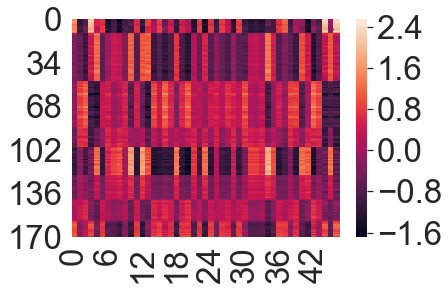

In [55]:
sns.heatmap(df_important.values[np.argsort(new_labels)])

##### Now we can see  the clusters more clear, and we can count 8 of them!